In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("Part2 - Company.xlsx")

In [3]:
df.shape

(61, 5)

In [4]:
df.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [5]:
df1 = df.copy()

In [6]:
#drop the null vaues from the new dataframe
df1.dropna(axis=0,inplace=True)

In [7]:
df1.shape

(43, 5)

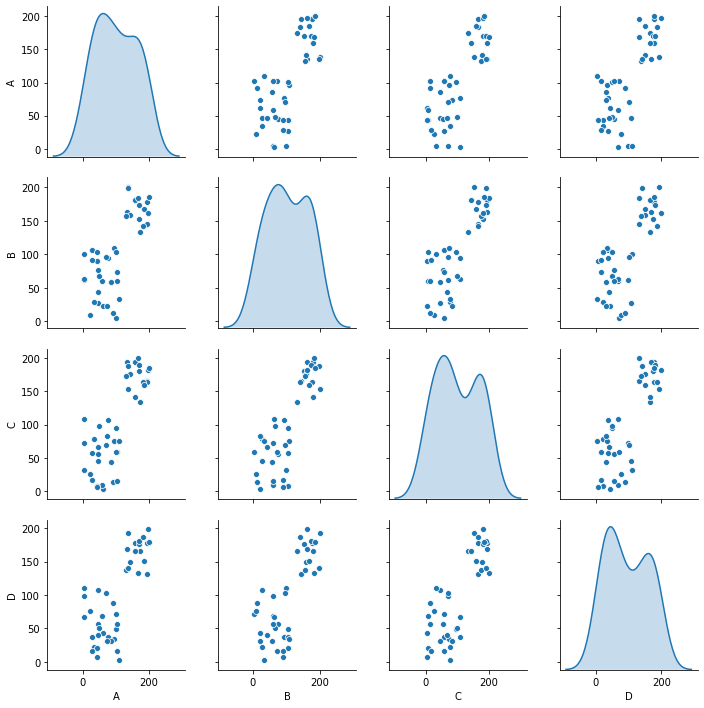

In [9]:
sns.pairplot(df1,diag_kind='kde')
plt.show()

All the cells above seem to come from a normal distribution and they're highly correlated.

In [10]:
#now separate the dataframe into dependent and independent variables
df_independent_attr = df1.drop('Quality',axis=1)
df_dependent_attr = df1['Quality']
print("shape of df_independent_attr::",df_independent_attr.shape)
print("shape of df_dependent_attr::",df_dependent_attr.shape)

shape of df_independent_attr:: (43, 4)
shape of df_dependent_attr:: (43,)


In [11]:
#now scale the independent attribute and replace the dependent attr value with number
df_independent_attr_scaled = df_independent_attr.apply(zscore)
df_dependent_attr.replace({"Quality A":0,"Quality B":1}, inplace=True)

In [12]:
df_dependent_attr.head()

0    0
1    1
3    0
4    0
6    0
Name: Quality, dtype: int64

In [13]:
#make the covariance matrix and we have 18 independent features so aur covariance matrix is 18*18 matrix
cov_matrix = np.cov(df_independent_attr_scaled,rowvar=False)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (4, 4)
Covariance_matrix [[1.02380952 0.74971035 0.81475002 0.7692498 ]
 [0.74971035 1.02380952 0.84392467 0.78254782]
 [0.81475002 0.84392467 1.02380952 0.82327864]
 [0.7692498  0.78254782 0.82327864 1.02380952]]


In [14]:
rawdata_X_train,rawdata_X_test,rawdata_y_train,rawdata_y_test = train_test_split(df_independent_attr_scaled,df_dependent_attr,test_size=0.20,random_state=1)

In [15]:
print("shape of rawdata_X_train",rawdata_X_train.shape)
print("shape of rawdata_y_train",rawdata_y_train.shape)
print("shape of rawdata_X_test",rawdata_X_test.shape)
print("shape of rawdata_y_test",rawdata_y_test.shape)

shape of rawdata_X_train (34, 4)
shape of rawdata_y_train (34,)
shape of rawdata_X_test (9, 4)
shape of rawdata_y_test (9,)


In [16]:
#now we will train the model with both raw data and pca data with new dimension
svc = SVC() #instantiate the object

In [17]:
svc.fit(rawdata_X_train,rawdata_y_train)

C:\Users\37086\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
rawdata_y_predict = svc.predict(rawdata_X_test)

In [19]:
print("Accuracy score with raw data",accuracy_score(rawdata_y_test,rawdata_y_predict))

Accuracy score with raw data(18 dimension) 1.0


In [21]:
#now with the help of above covariance matrix we will find eigen value and eigen vectors
pca_to_learn_variance = PCA(n_components=4)
pca_to_learn_variance.fit(df_independent_attr_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
#display explained variance ratio
pca_to_learn_variance.explained_variance_ratio_

array([0.83425424, 0.06765615, 0.05856853, 0.03952108])

In [23]:
#display explained variance
pca_to_learn_variance.explained_variance_

array([3.41646973, 0.27706804, 0.23985208, 0.16184823])

In [24]:
#display principal components
pca_to_learn_variance.components_

array([[ 0.49082127,  0.49769652,  0.51381888,  0.49737593],
       [-0.79680439,  0.58840207,  0.09625227,  0.09808806],
       [-0.24682715, -0.4514046 , -0.1450751 ,  0.84514109],
       [-0.25154246, -0.44979447,  0.84004695, -0.16950649]])

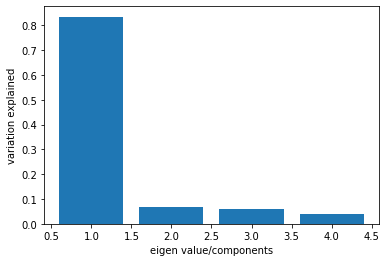

In [26]:
plt.bar(list(range(1,5)),pca_to_learn_variance.explained_variance_ratio_)
plt.xlabel("eigen value/components")
plt.ylabel("variation explained")
plt.show()

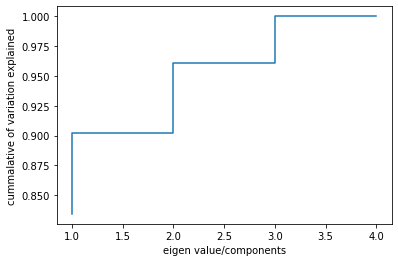

In [27]:
plt.step(list(range(1,5)),np.cumsum(pca_to_learn_variance.explained_variance_ratio_))
plt.xlabel("eigen value/components")
plt.ylabel("cummalative of variation explained")
plt.show()

In [30]:
#use only 1 principal component
pca_one_component = PCA(n_components=1)
pca_one_component.fit(df_independent_attr_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
#transform the raw data which is in 4 dimensions into 1 new dimension with pca
df_pca_independent_attr = pca_one_component.transform(df_independent_attr_scaled)

In [32]:
#display the shape of df_pca_independent_attr
df_pca_independent_attr.shape

(43, 1)

In [33]:
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(df_pca_independent_attr,df_dependent_attr,test_size=0.20,random_state=1)

In [34]:
print("shape of pca_X_train",pca_X_train.shape)
print("shape of pca_y_train",pca_y_train.shape)
print("shape of pca_X_test",pca_X_test.shape)
print("shape of pca_y_test",pca_y_test.shape)

shape of pca_X_train (34, 1)
shape of pca_y_train (34,)
shape of pca_X_test (9, 1)
shape of pca_y_test (9,)


In [35]:
#now fit the model on pca data with new dimension
svc.fit(pca_X_train,pca_y_train)

C:\Users\37086\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
#predict the y value
pca_y_predict = svc.predict(pca_X_test)

In [37]:
print("Accuracy score with pca data(1 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Accuracy score with pca data(1 dimension) 1.0


In [46]:
null_df = df[(pd.isnull(df).any(axis=1)==True)]

In [47]:
null_df

,A,B,C,D,Quality
2,159,163,135,131,NaN
5,153,140,154,199,NaN
7,191,144,143,154,NaN
9,145,178,158,141,NaN
14,186,142,146,174,NaN
18,167,171,163,191,NaN
23,171,185,181,183,NaN
27,193,169,199,155,NaN
29,29,49,6,35,NaN
32,161,138,143,139,NaN


In [50]:
null_df_independent_attr = null_df.drop('Quality',axis=1)

In [51]:
null_df_independent_attr

,A,B,C,D
2,159,163,135,131
5,153,140,154,199
7,191,144,143,154
9,145,178,158,141
14,186,142,146,174
18,167,171,163,191
23,171,185,181,183
27,193,169,199,155
29,29,49,6,35
32,161,138,143,139


In [53]:
null_df_independent_attr_scaled = null_df_independent_attr.apply(zscore)

In [58]:
pca_one_component.fit(null_df_independent_attr_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
null_df_pca_independent_attr = pca_one_component.transform(null_df_independent_attr_scaled)

In [62]:
missing_y_predict = svc.predict(null_df_pca_independent_attr)

In [63]:
missing_y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)